[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]
[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


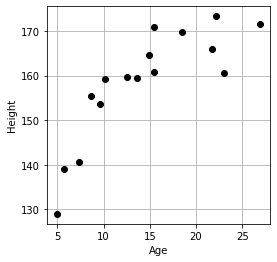

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(seed=1)
x_min = 4
x_max = 30
x_n = 16
X = 5 + 25*np.random.rand(x_n)
prm_c = [170, 108, 0.2]
T = prm_c[0] - prm_c[1]*np.exp(-prm_c[2]*x) + 4*np.random.randn(x_n)
np.savez('ch5_data.npz',X=X, x_min=x_min, x_max=x_max, x_n=x_n, T=T)

print(np.round(X,2))
print(np.round(T,2))

plt.figure(figsize=(4,4))
plt.plot(X,T,'ko')
plt.grid(True)
plt.xlabel('Age')
plt.ylabel('Height')
plt.show()

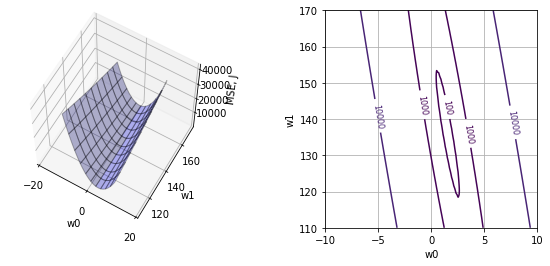

In [18]:
from mpl_toolkits.mplot3d import Axes3D

def mse_line(x, t, w) :
    y = w[0]*x + w[1]
    mse = np.mean( (y-t)**2)
    return mse

xn = 100
w0_range = [-10, 10]
w1_range = [110, 170]
x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)
xx0, xx1 = np.meshgrid(x0,x1)
J = np.zeros((len(x0), len(x1)))

for i0 in range(xn):
    for i1 in range(xn):
        J[i1,i0] = mse_line(X, T, (x0[i0], x1[i1]))
        
plt.figure(figsize=(9.5,4))
plt.subplots_adjust(wspace=0.5)

ax = plt.subplot(1,2,1,projection='3d')
ax.plot_surface(xx0, xx1, J, rstride=10, cstride=10, alpha=0.3, color='blue', edgecolor='black')
ax.set_xticks([-20,0,20])
ax.set_yticks([120, 140, 160])
ax.view_init(60, -60)
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('MSE, J')

plt.subplot(1,2,2)
cont=plt.contour(xx0,xx1,J,30,levels=[100,1000,10000,100000])
cont.clabel(fmt='%1.0f',fontsize=8)
plt.xlabel('w0')
plt.ylabel('w1')
plt.grid(True)
plt.show()

In [20]:
def dmse_line(x,t,w):
    y=w[0]*x+w[1]
    d_w0=2*np.mean((y-t)*x)
    d_w1=2*np.mean(y-t)
    return d_w0, d_w1

d_w = dmse_line(X, T, [4,165])
print(np.round(d_w,1))

[2057.1  128.7]


ValueError: Invalid format specifier

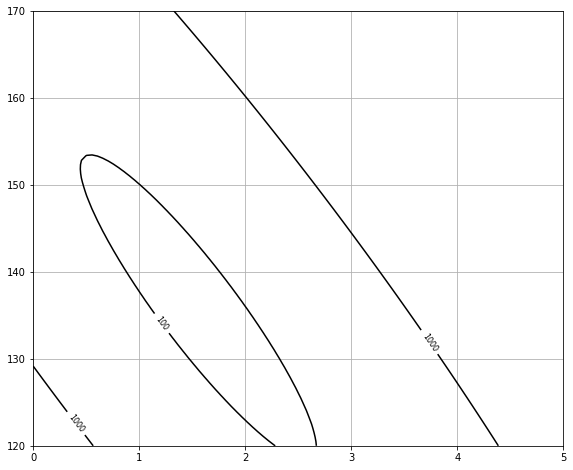

In [28]:
def fit_line_num(x,t):
    w_init = [10.0, 165.0]
    alpha = 0.001
    i_max = 100000
    eps = 0.1
    w_i = np.zeros([i_max,2])
    w_i[0,:] = w_init
    for i in range(1, i_max):
        dmse = dmse_line(x, t , w_i[i-1])
        w_i[i,0] = w_i[i-1,0] - alpha * dmse[0]
        w_i[i,1] = w_i[i-1,1] - alpha * dmse[1]
        if max(np.absolute(dmse)) < eps:
            break
        if i>13800 :
            print('Step {0:d} : [{1:.6f}, {2:,6f}]'.format(i,w_i[i,0], w_i[i,1]))

    w0 = w_i[i,0]
    w1 = w_i[i,1]
    w_i = w_i[:i,:]
    return w0, w1, dmse, w_i

plt.figure(figsize=(9.5,8))
w0_range = [0,5]
w1_range = [120, 170]
x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)
J = np.zeros((len(x0), len(x1)))
for i0 in range(xn):
    for i1 in range(xn):
        J[i1, i0] = mse_line(X, T, (x0[i0],x1[i1]))
cont = plt.contour(x0, x1, J, 30, colors = 'black', levels=(100, 1000, 10000, 100000))
cont.clabel(fmt='%1.0f', fontsize=8)
plt.grid(True)

W0, W1, dMSE, W_history = fit_line_num(X,T)

print('반복횟수 {0}'.format(W_history.shape[0]))
print('W={0:.6f}, {1:.6f}'.formta(W0,W1))
print('dMSE=[{0:.6f}, {1:.6f}]'.format(dMSE[0], dMSE[1]))  
print('MSE={0:.6f}'.format(mse_line(X,T,[W0,W1])))
plt.plot(W_history[:,0], W_history[:,1], '.-')
plt.show()